# Data Analysis 



## 1. Correlation Heatmap

Creating a heat map that visualizes the correlations between stocks and indices 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

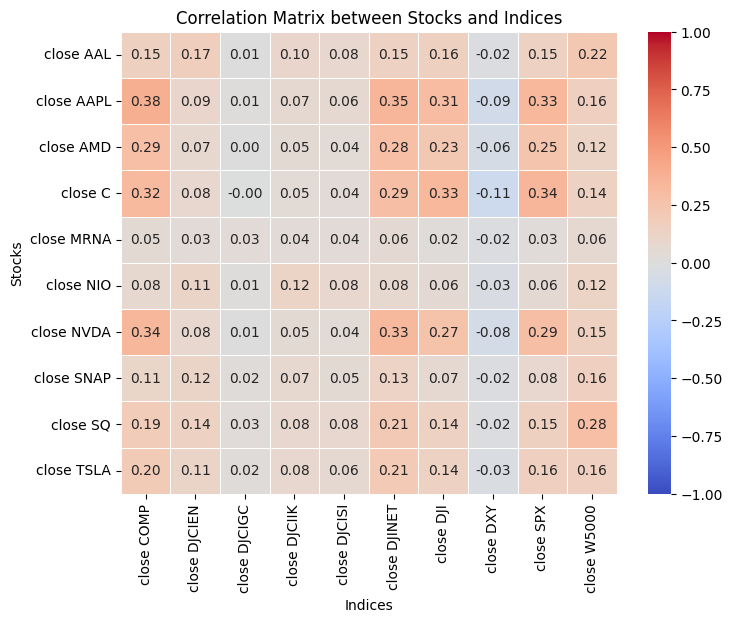

In [13]:
csv_pfad = '../../differenced.csv'

df = pd.read_csv(csv_pfad, index_col=1, parse_dates=True)

stocks = df.iloc[:, 1:11]  
indices = df.iloc[:, 11:21]  


# Konvertierung der Ergebnisse in einen DataFrame für die Heatmap
korrelationen = pd.DataFrame(index=stocks.columns, columns=indices.columns)
for col1 in stocks.columns:
    for col2 in indices.columns:
        korrelationen.at[col1, col2] = stocks[col1].corr(indices[col2])

plt.figure(figsize=(8, 6)) 
sns.heatmap(korrelationen.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix between Stocks and Indices')
plt.xlabel('Indices')
plt.ylabel('Stocks')
plt.show()

Splitted heatmap: Indices only and stocks only for better readability 

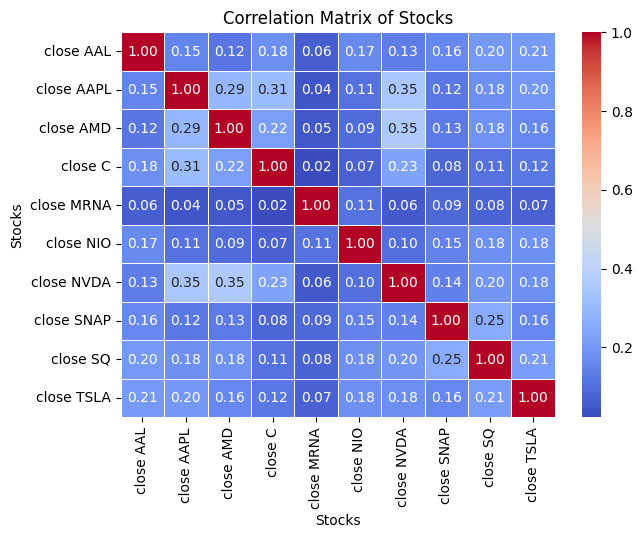

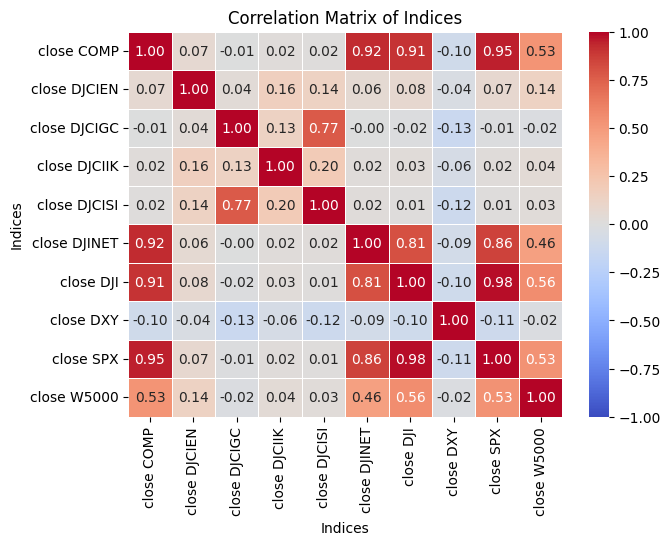

In [14]:


# Heatmap jeweils für Indices und Aktien getrennt
kurs_spalten_stocks = df.iloc[:, 1:11]
kurs_spalten_indices = df.iloc[:, 11:21]

korrelationsmatrix_stocks = kurs_spalten_stocks.corr()
korrelationsmatrix_indices = kurs_spalten_indices.corr()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_stocks, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True)

plt.title('Correlation Matrix of Stocks')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_indices, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Indices')
plt.xlabel('Indices')
plt.ylabel('Indices')
plt.show()

Correlations between indices and stocks as well as correlations among stocks themselves are desirable for our model in order to improve the prediction quality. However, we would like to avoid correlations within the indices (independent variables) in order to avoid multicollinearity in our model.    
In terms of stocks, Nvidia is correlated with Apple and Advanced Micro Devices. This is in line with our expectations, as Nvidia and AMD operate in very related fields and Apple also operates in a very similar business field in the computer industry.
Unfortunately, the indices correlate strongly with each other. COMP, DJINET, DJI and SPX in particular show a strong correlation. In addition, the overall heatmap above shows that these indices correlate with the same stocks.   
In order to avoid multicollinearity DJINET, DJI and SPX are excluded from the data and only COMP is kept, as COMP correlates strongly with all three indices and also has the strongest influence on the stocks.


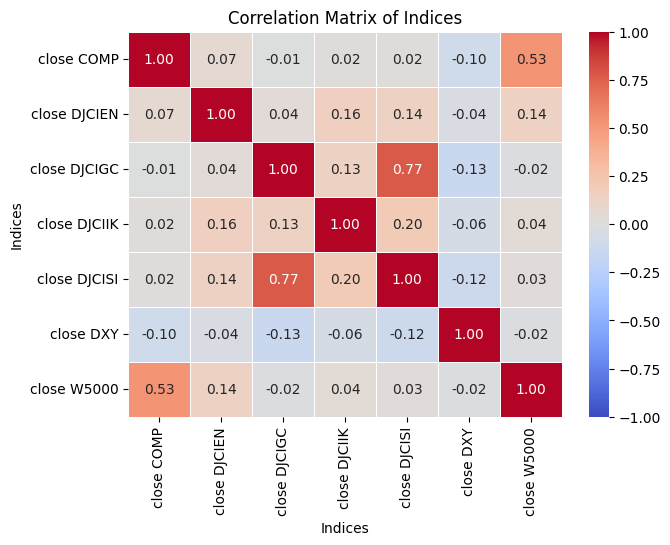

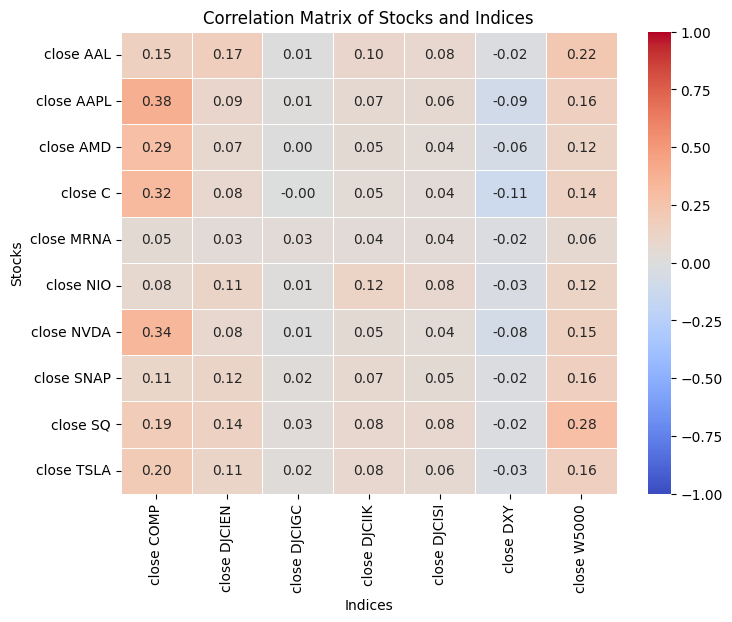

In [15]:

df_cleaned = df.drop(columns=['close DJINET', 'close DJI', 'close SPX'])  
    # Heatmap jeweils für Indices und Aktien getrennt

kurs_indices_clean = df_cleaned.iloc[:, 11:18]

korrelationsmatrix_indices_clean = kurs_indices_clean.corr()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_indices_clean, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Indices')
plt.xlabel('Indices')
plt.ylabel('Indices')
plt.show()


# ab hier gut

    

stocks = df_cleaned.iloc[:, 1:11]  
indices = df_cleaned.iloc[:, 11:18] 

korrelationen_clean = pd.DataFrame(index=stocks.columns, columns=indices.columns)
for col1 in stocks.columns:
    for col2 in indices.columns:
        korrelationen_clean.at[col1, col2] = stocks[col1].corr(indices[col2])

plt.figure(figsize=(8, 6)) 
sns.heatmap(korrelationen_clean.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Stocks and Indices')
plt.xlabel('Indices')
plt.ylabel('Stocks')
plt.show()